## Assessment 2 Cognitive Neural Networks 

Ben Haras-Gummer

University of Kent

COMP6360/8360

### Practical Exploration of Hebbian Learning - Part 1
A visual representation of how the hebbian rule works is shown below. A problem with the hebb rule is that the weights will grow exponentially. I will fix this by implmenting Ojas rule into my code which will address this issue.

<img src="NeuralNetworks Heb.jpg" alt="3D figure" class="bg-primary mb-1" width="600px">

In [1]:
import numpy as np

# load data from the text file
data = np.loadtxt('data_HL_simple.txt', usecols=range(5))
print(data[1:5,:])

# initialize the weights to random values
w = np.random.normal(0, 0.5, 5)

print("initial weights")
print(w)

# learning rate; don't change the learning rate epsilon when you are working on questions 2 and 3, unless you really know what you are doing. You may want to make the learning rate dependent on the epoch number to converge to a stable solution.
epsilon = 1

num_iterations = 4

update = 0
# we can do a fixed number of iterations because the simple Hebb rule won't converge
for i in range(num_iterations):
    for x in data:
        # Calculate the predicted output
        y_pred = np.dot(x, w)

        # Update the weights
        w += epsilon * x * y_pred

        update = update + 1
        if update % 10 == 0:
            # print every 10th update
            print("\tCurrent input: " + str(x))
            # print the weights for every x to see how they are evolving
            print("New Weights:\n" + str(w))

# the final weights
print("Final weights:\n" + str(w))

[[-1.  0. -1. -1.  1.]
 [-1. -1. -1. -1.  1.]
 [ 1.  0.  1.  1. -1.]
 [ 0. -1.  0.  0.  0.]]
initial weights
[-0.38294268 -0.23840422 -0.57678606 -0.73886951 -0.34460776]
	Current input: [0. 0. 0. 0. 0.]
New Weights:
[  -672.01594279  -8162.382679   -10810.72174831 -10810.88383176
  10809.80035449]
	Current input: [-1.  0. -1. -1.  1.]
New Weights:
[-15828041.89364763  -5654464.83644537 -14354325.45093032
 -14354325.61301376  14354324.5295365 ]
	Current input: [0. 1. 0. 0. 0.]
New Weights:
[-1.76379166e+08 -5.15580162e+08 -3.67470725e+09 -3.67470725e+09
  3.67470725e+09]
	Current input: [ 0.  0.  1.  1. -1.]
New Weights:
[ 1.40605021e+13 -1.71250259e+11 -6.92739008e+13 -6.92739008e+13
  6.92739008e+13]
	Current input: [ 1.  1.  1.  1. -1.]
New Weights:
[-9.04830015e+17 -5.20236168e+17 -9.16705180e+17 -9.16705180e+17
  9.16705180e+17]
	Current input: [0. 0. 0. 0. 0.]
New Weights:
[-1.87113631e+21 -2.27290474e+22 -3.01035067e+22 -3.01035067e+22
  3.01035067e+22]
	Current input: [-1.  0. 

**(2-4):** Run your implementation of the Hebb rule on `data_HL_simple.txt`, and inspect the weights $w$ after every step of the algorithm. Identify the correlational pattern that the algorithm discovers. Are there any positively or negatively correlated features in these data according to the pattern seen in $w$?

**(Answer):**
After running my simple hebb rule code on the 'data_HL_simple.txt' there is a clear correlation between the 3rd and 4th values. When the 4th value is high the 3rd value is high, if the 4th value is low the 3rd value will be low. The values of the 5th feature tend to be opposite of other features demonstrating a negative correlation. For example, when the values of other features are high, the value of the 5th feature is likely to be low, and when the values of other features are low, the value of the 5th feature is likely to be high. The 1st and 2nd features do not appear to have a strong correlation with the other features, as indicated by the relatively small values of the weights.

### Oja's Rule

In this section, I will use a different dataset that is in `data_two_groups.txt`. It contains five features. I will alter my hebbian rule code to ensure the weights dont explode.

- **(3-4):** The next step requires coding. Extend the code that implements simple Hebbian learning above and implement Oja's rule to learn one principal component for these data. We are interested in exactly one principal component in this exercise. Your implementation of Oja's rule should appear in the Python block below.

- **(3-5):** Run your implementation of Oja's rule on `data_two_groups.txt`. Use the vector of parameters $w$ that you will obtain using Oja's rule to project the original five-dimensional data into 1 dimension defined by $w$. The image that you will obtain should be similar to the one produced by PCA in `sklearn` above. The images may be identical if you have run Oja's rule until convergence, but this is not guaranteed. This step will allow you to see very clearly how a low dimensional representation (and hence data compression) can be achieved using Hebbian learning/Oja's rule or PCA.

[[-0.20752314 -0.36773773  1.22059844  0.55048877  1.88427215]
 [-1.57125555  1.32390861 -1.47812951 -1.43172722 -3.19127369]
 [-0.82290562  2.27103446 -2.12484964 -2.12484964 -4.13049738]
 [ 0.97027764  0.91336865 -3.52387133 -3.22573866 -6.63143683]]
initial weights
[0.6676166  0.11523744 0.83249353 0.26466584 0.82238854]
	Current input: [-0.14225842  0.92044523 -1.62046158 -1.62046158 -3.44263005]
New Weights:
[ 0.13239074 -0.02682659  0.42298531  0.39433956  0.81497854]
	Current input: [ 1.04787451 -0.18319438  0.8286063   2.55352384  3.10636035]
New Weights:
[-0.02357366 -0.02233085  0.41560239  0.39955344  0.8230041 ]
	Current input: [-0.64991566  0.56822123  4.02756301  4.02756301  8.35542888]
New Weights:
[-0.06731805  0.05672698  0.3991873   0.39865969  0.82797717]
	Current input: [ 1.17858979 -0.62115521  2.18768608  2.18768608  4.23762284]
New Weights:
[ 0.07010681 -0.03317651  0.39781174  0.41983515  0.81611924]
	Current input: [ 0.43291965 -1.92305982  2.43448814  2.440399

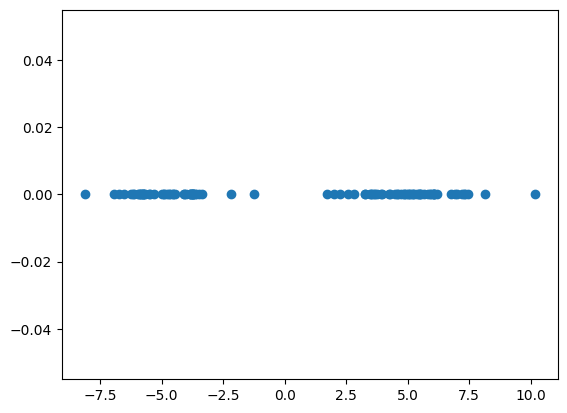

In [2]:
# Implement Oja's rule here extending your previous implementation
# of the simple Hebb rule. Note that this question on Oja's rule
# uses a different dataset. So, don't forget to change the dataset
# after you have copied the code to this block.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# load data from the text file
data = np.loadtxt('data_two_groups.txt', usecols=range(5))
print(data[1:5,:])

# initialize the weights to random values between 0 and 1
w = np.random.rand(5)

print("initial weights")
print(w)

# learning rate; don't change the learning rate epsilon when you are working on questions 2 and 3, unless you really know what you are doing. You may want to make the learning rate dependent on the epoch number to converge to a stable solution.
epsilon = 0.01

num_iterations = 100

update = 0

# Increased the number of iterations to 100 to ensure convergence
for i in range(num_iterations):
    for x in data:
        # Calculate the predicted output
        y_pred = np.dot(x, w)

        # Update the weights this time applying Ojas'rule to stop the weights growing exponentially
        w += epsilon * (x * y_pred - y_pred**2 * w)

        update = update + 1
        if update % 10 == 0:
            # print every 10th update
            print("\tCurrent input: " + str(x))
            # print the weights for every x to see how they are evolving
            print("New Weights:\n" + str(w))

# the final weights
print("Final weights:\n" + str(w))

# Calculate the projected data
projected_data = np.dot(data, w)

# Create a scatter plot of the projected data
plt.scatter(projected_data, np.zeros_like(projected_data))

# Show the plot
plt.show()

### Practical Exploration of Hebbian Learning - Part 2

## Question 1 - PCA Applied to Iris Data

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# load the data from sklearn
iris = load_iris()

# X is np.ndarray and it contains four predictor attributes
X = iris.data
y = iris.target

# print descriptive statistics using pandas data frame
df_X = pd.DataFrame(X)
print(df_X.describe())


                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333
std      0.828066    0.435866    1.765298    0.762238
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


In [4]:
# the number of principal components
n_components = 2

pca = PCA(n_components=n_components)

In [5]:
# We fit the model and then transform the data.

# Fit the model to the data; this is where PCA will do what Hebbian learning does to compute one principal component
pca.fit(X)

# print the principal components
print("weights\n" + str(pca.components_) + "\nend\n")

# we can now transform the data and project it to 2 dimensions.
X_pca = pca.transform(X)

print("Data after PCA is applied\n" + str(X_pca[:5,:]) + "\nend\n")
print("Data before PCA is applied\n" + str(X[:5,:]))

weights
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
end

Data after PCA is applied
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]
end

Data before PCA is applied
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


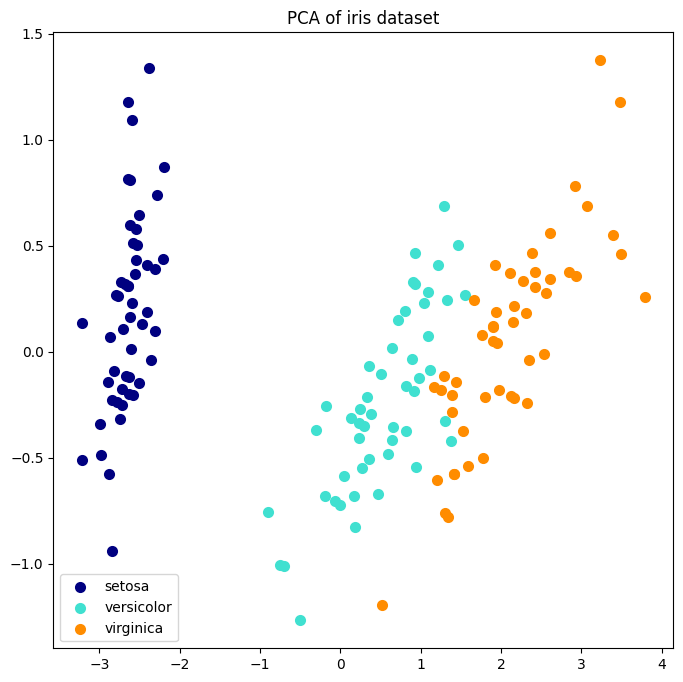

In [6]:
# Define a list of colors to use for the scatter plot
colors = ['navy', 'turquoise', 'darkorange']

# Set the title for the plot
title = "PCA"

# Create a new figure with a specified size
plt.figure(figsize=(8, 8))

# Set up a loop to iterate over the target labels and their corresponding colors
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    # Plot the projection of the data onto the two principal components
    # using the specified color and line width for each group of points
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, lw=2, label=target_name)

# Add a title to the plot
plt.title(title + " of iris dataset")

# Add a legend to the plot
plt.legend(loc="best", shadow=False, scatterpoints=1)

# Display the plot
plt.show()


- **(1-1):** In the above code, identify Python variables that correspond to the weights $w$ in our lecture notes. Is $w$ a scalar or a vector? If it is a vector, what is its dimensionality?

- **(1-2):** In the above code, identify Python variables that correspond to the symbol $y_j$ in our lecture notes. What is the range of $j$ in this example? How does the number of values of $y_j$ relate to the number of data examples?

- **(Answer):** The principal components are stored in the 'components_' attribute of the model. This variable would represent the "weights" we discussed in the lectures and it is a 2x4 vector.
                The variable 'X' represents the data on which PCA is applied, this data is the input for the PCA algorithm. After applying PCA, the new, projected data is stored in the 'transform' attribute of the PCA model. This new, projected data can be thought of as the "Yj".
                The range of j in Yj is dependent on the number of pincipal components which in this case is 2. Given the output of this code the transformed data 'X_PCA' has 2 columns coressponding to the 2 principal components. Therefore, the range of j in this example would be 0 to 1.
                The number of values of $y_j$ relates directly to the number of data examples. So, the number of values in $y_j$ is equal to the number of data examples in the original data X, n_samples. In this way, the number of rows in $y_j$ is the same as the number of rows in X, reflecting that each data point in X is transformed into a corresponding data point in $y_j$.

## Scatterplot for Reconstruction Errors

First, study the code presented below. It loads the wine dataset (https://archive.ics.uci.edu/ml/datasets/wine), selects two of its features (`flavanoids` and `total_phenols`), and runs PCA to extract 1 principal component from the resulting 2D data.

[[1.03073034 0.50488764]
 [0.73073034 0.35488764]
 [1.21073034 0.50488764]
 [1.46073034 1.55488764]
 [0.66073034 0.50488764]]
the parameters/axis
[[0.86285419 0.50545291]]
data_pca is the 1D representation of our data:
[[0.80989272]
 [1.29988067]
 [2.04631978]
 [0.82531087]]


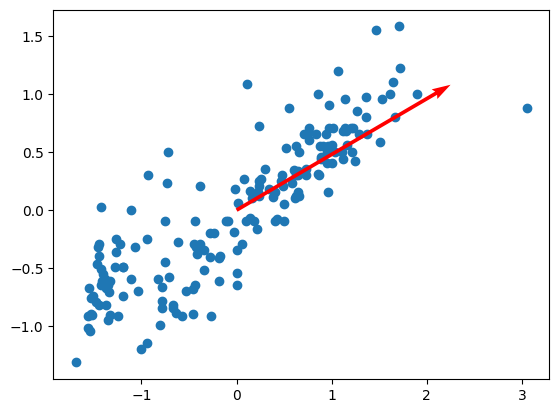

[[0.69881933 0.40936263]
 [1.12160749 0.65702847]
 [1.7656756  1.03431828]
 [0.71212294 0.41715578]]
[[0.73073034 0.35488764]
 [1.21073034 0.50488764]
 [1.46073034 1.55488764]
 [0.66073034 0.50488764]]


In [7]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

wine = load_wine()
#dfwine = pd.DataFrame(wine.data, columns=wine.feature_names)
#print(dfwine.corr())

# we select 2 features that are correlated in this dataset
ind = [wine['feature_names'].index('flavanoids'), wine['feature_names'].index('total_phenols')]
data = wine.data[:,ind]
# we centre the data to make the code below simpler
data = data - np.mean(data, axis=0)
print(data[0:5,:])

# we will extract 1 component; note that our data is 2D
n_components = 1

pca = PCA(n_components=n_components)

# We fit the model and transform the data in one line.
data_pca = pca.fit_transform(data)
print("the parameters/axis")
print(pca.components_)
print("data_pca is the 1D representation of our data:")
print(data_pca[1:5])

# plot the data with the first PC
plt.scatter(data[:,0], data[:,1])
plt.quiver(pca.components_[0][0], pca.components_[0][1], color=['red'], scale=2)
plt.show()

#recreate the original data by performing an inverse transform on the data_pca 
data_rec = pca.inverse_transform(data_pca)

print(data_rec[1:5,:])
print(data[1:5,:])
# data is the original data, and data_pca is the low dimensional representation of the data
# your next step is to compute data_rec, which will be the reconstruction of the original data using data_pca
# we are interested in the errors between data and data_rec

- **(3-1)** Compute `data_rec`, which is the reconstruction of the original data from its compressed 1D representation that is stored in `data_pca`.

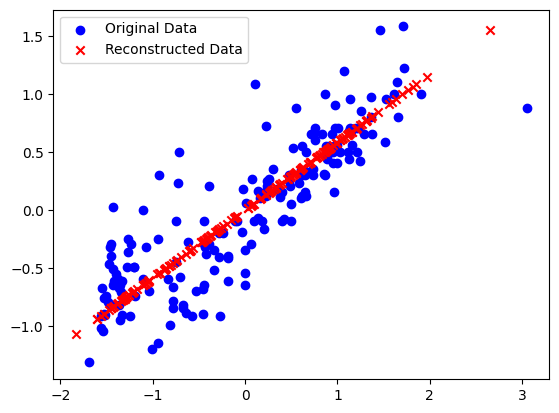

In [8]:
# Plot the original data
plt.scatter(data[:,0], data[:,1], color='blue', marker='o', label='Original Data')
# Plot the reconstructed data
plt.scatter(data_rec[:,0], data_rec[:,1], color='red', marker='x', label='Reconstructed Data')
# Add a legend
plt.legend()
# Show the plot
plt.show()


## Practical Exploration of the Delta

 Imagine that you have a dataset with several input features and one target attribute. Assume that the target attribute is named smoker and has values 0 and 1. You have applied the delta rule with the sigmoid activation to learn a predictive model for this dataset, and your final model has $SSE_{OLD}=10^{-4}$. Then, you remove the sigmod activation from your model, and (keeping all the weights $w$ unchanged) you recompute the SSE of the modified model. We assume that both SSEs are computed using the same set of data examples. Is it possible that the $SSE$ of the modified model is much higher than the $SSE$ of the original model, e.g., $SSE_{NEW}=10^2>>SSE_{OLD}=10^{-4}$? Justify your answer.

- **(Answer):** In the context of this question the sigmoid activation is utilised in order to introduce non-linearity to the model and enable it to learn complex decision boundaries. By removing the sigmoid activation from the model it will be limited to linear decision boundaries which will result in a much higher SSE for the modified model as it will not be able to learn the decision boundary that best fits the data. The sigmoid activation is also used to normalise the output to values between 0 and 1 making it easier to interpret the output as a probability. By removing the sigmoid activation, the output will no longer be normalised and will be difficult to interpret as a probability of the binary classification.